<a href="https://colab.research.google.com/github/tekassh1/Math-Statistic/blob/main/Statistic_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 1**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt

samples_am = 10000
sample_len = 10000

samples = np.array(list(np.random.randn(sample_len) for i in range(samples_am)))

sample_means = np.zeros(samples_am)
sample_variances = np.zeros(samples_am)
sample_quantiles = np.zeros(samples_am)
samples_gamma1 = np.zeros(samples_am)
samples_gamma2 = np.zeros(samples_am)

for i in range(samples_am):
  sample_means[i] = np.mean(samples[i])
  sample_variances[i] = np.var(samples[i])
  sample_quantiles[i] = np.quantile(samples[i], 0.5)

  sorted_sample = np.sort(samples[i])
  samples_gamma1[i] = sample_len * stats.norm.cdf(sorted_sample[1], 0, 1)
  samples_gamma2[i] = sample_len * (1 - stats.norm.cdf(sorted_sample[-1], 0, 1))

$\frac{\sqrt n(\hat{θ} - \theta)}{\sigma (θ)}\to N(0,1),  n \to \infty$

In [ ]:
# Normalization
sample_mean_means = np.mean(sample_means)
sample_mean_variances = np.mean(sample_variances)
sample_mean_quantiles = np.mean(sample_quantiles)

standard_error_means = np.std(sample_means) / np.sqrt(sample_len)
standard_error_variances = np.std(sample_variances) / np.sqrt(sample_len)
standard_error_quantiles = np.std(sample_quantiles) / np.sqrt(sample_len)

normalized_means = (sample_means - sample_mean_means) / standard_error_means
normalized_variances = (sample_variances - sample_mean_variances) / standard_error_variances
normalized_quantiles = (sample_quantiles - sample_mean_quantiles) / standard_error_quantiles

In [ ]:
# Hist normalizing
# means_weights = np.ones_like(sample_means) / sample_len
# variances_weights = np.ones_like(sample_variances) / sample_len
# quantiles_weights = np.ones_like(sample_quantiles) / sample_len

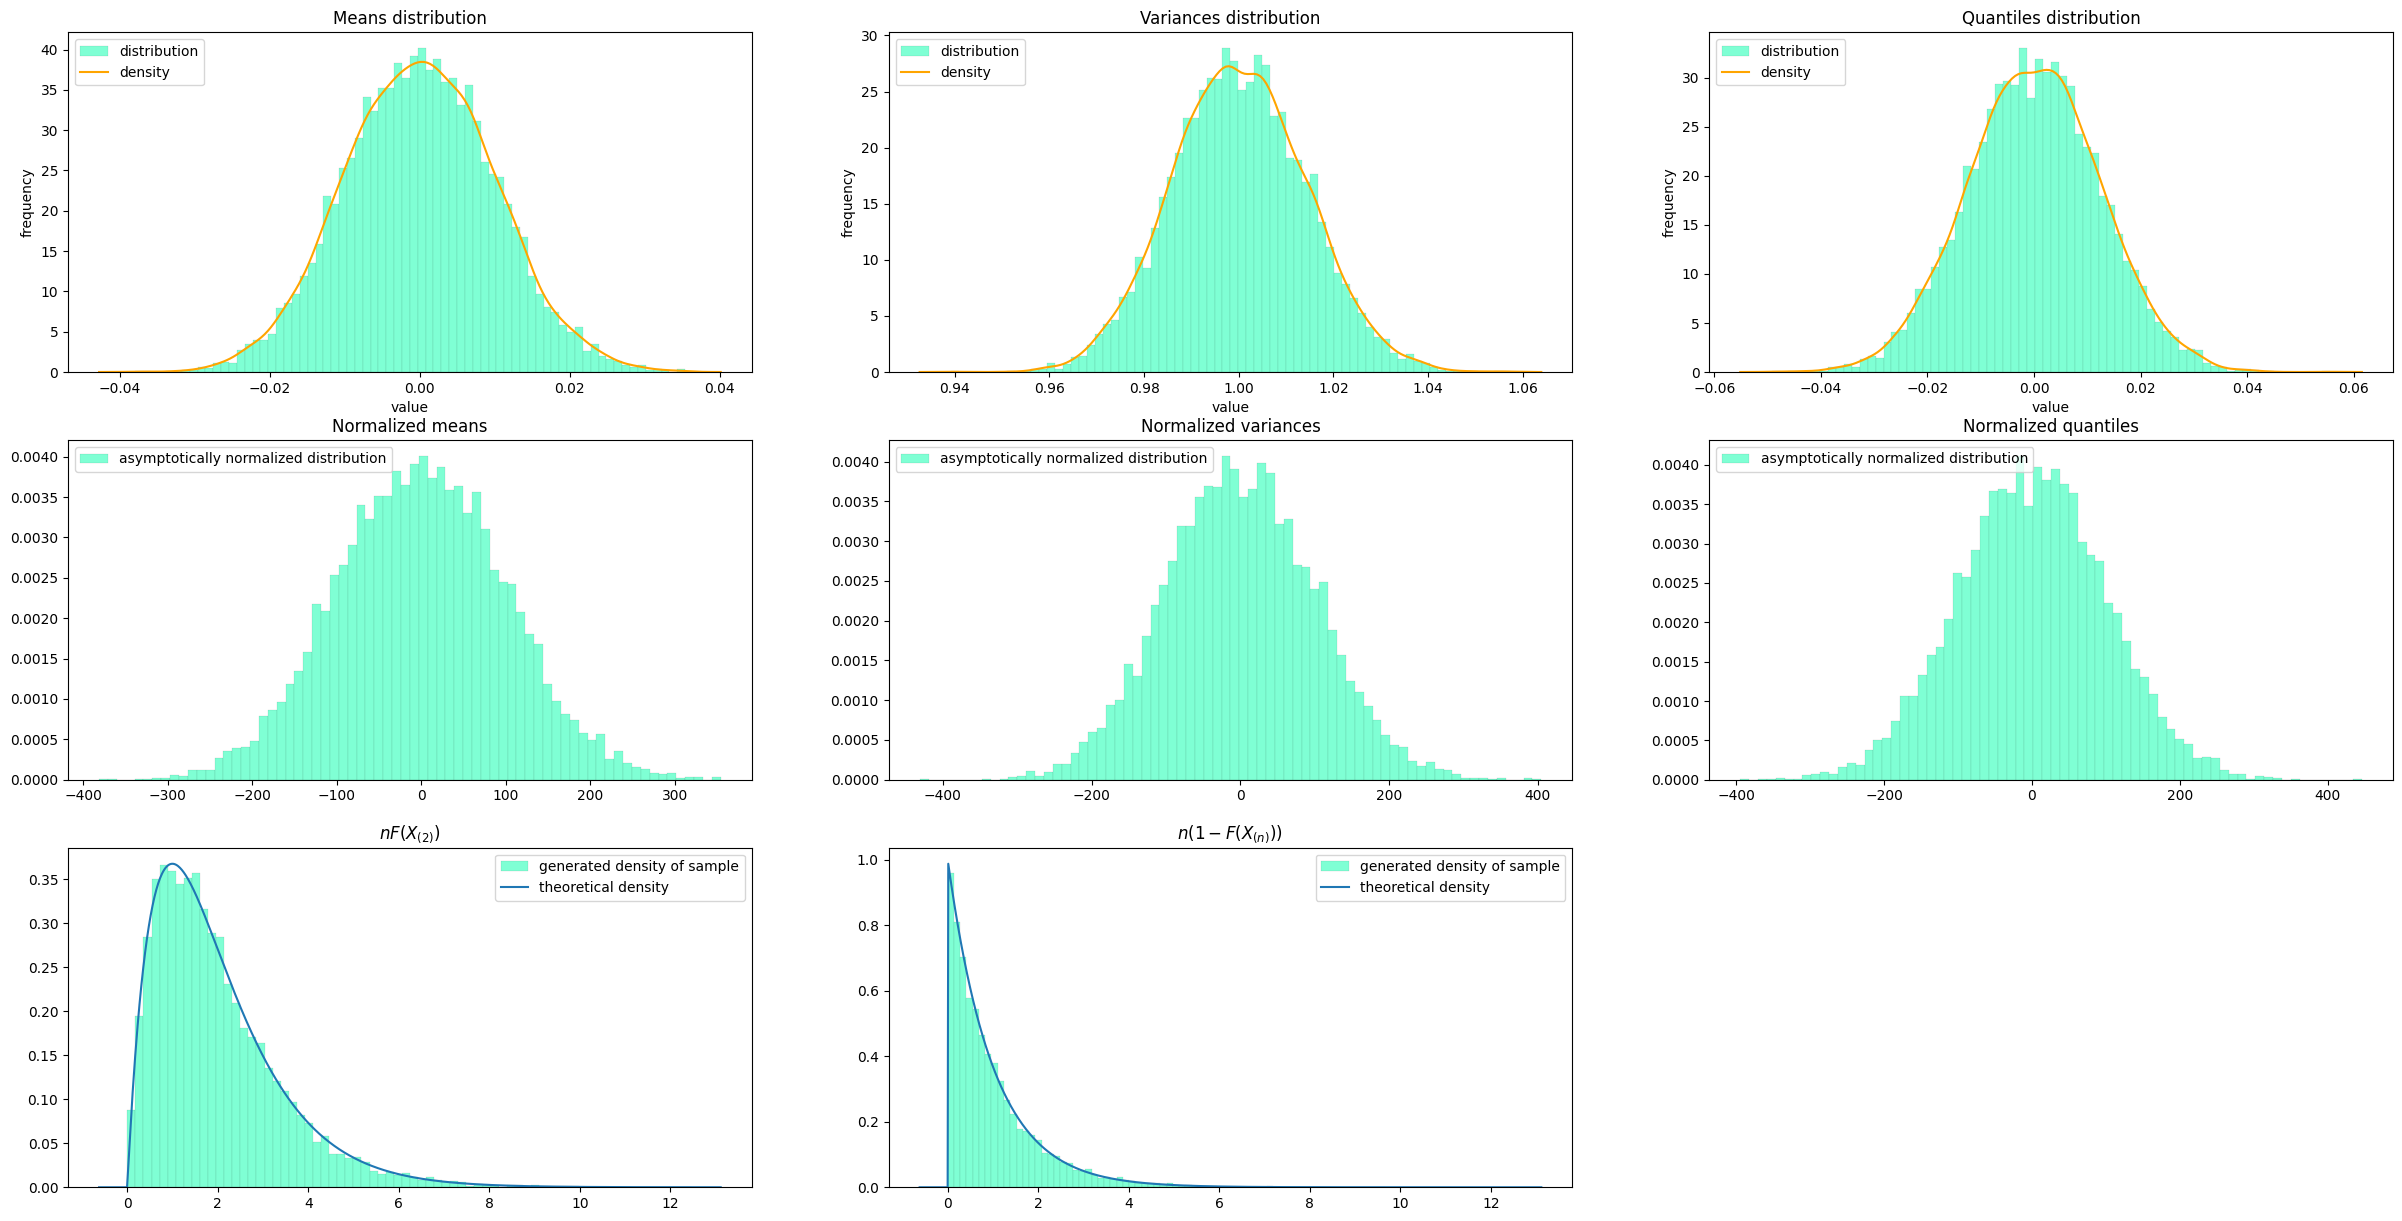

In [ ]:
# Printing plots

plt.figure(figsize=(30, 15))

plt.subplot(3, 3, 1)
plt.title("Means distribution")
plt.ylabel("frequency")
plt.xlabel("value")
plt.hist(sample_means, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="distribution", density=True)
sns.kdeplot(sample_means, color="orange", label="density")
plt.legend(loc="upper left")

plt.subplot(3, 3, 2)
plt.title("Variances distribution")
plt.ylabel("frequency")
plt.xlabel("value")
plt.hist(sample_variances, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="distribution", density=True)
sns.kdeplot(sample_variances, color="orange", label="density")
plt.legend(loc="upper left")

plt.subplot(3, 3, 3)
plt.title("Quantiles distribution")
plt.ylabel("frequency")
plt.xlabel("value")
plt.hist(sample_quantiles, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="distribution", density=True)
sns.kdeplot(sample_quantiles, color="orange", label="density")
plt.legend(loc="upper left")

plt.subplot(3, 3, 4)
plt.title("Normalized means")
plt.hist(normalized_means, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="asymptotically normalized distribution", density=True)
plt.legend(loc="upper left")

plt.subplot(3, 3, 5)
plt.title("Normalized variances")
plt.hist(normalized_variances, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="asymptotically normalized distribution", density=True)
plt.legend(loc="upper left")

plt.subplot(3, 3, 6)
plt.title("Normalized quantiles")
plt.hist(normalized_quantiles, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="asymptotically normalized distribution", density=True)
plt.legend(loc="upper left")


plt.subplot(3, 3, 7)
plt.title("$nF(X_{(2)})$")
plt.hist(samples_gamma1, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="generated density of sample", density=True)

xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 1000)
pdf = stats.gamma.pdf(x, a=2, scale=1)
plt.plot(x, pdf, label="theoretical density")
plt.legend(loc="upper right")

plt.subplot(3, 3, 8)
plt.title("$n(1 - F(X_{(n)}))$")
plt.hist(samples_gamma2, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="generated density of sample", density=True)

x = np.linspace(xmin, xmax, 1000)
pdf = stats.gamma.pdf(x, a=1, scale=1)
plt.plot(x, pdf, label="theoretical density")
plt.legend(loc="upper right")

plt.show()

### **Task 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.genfromtxt('iris.csv', delimiter=',', dtype=str)

for i in range(0, len(data)):
  data[i] = np.char.strip(data[i], '"')

data = data[1:]

iris_kinds = data[:, 4]
unique_iris_kinds, counts = np.unique(iris_kinds, axis=0, return_counts=True)
most_frequent_idx = np.argmax(counts)
least_frequent_idx = np.argmin(counts)

total_sum_areas = [(float(row[0]) * float(row[1])) + (float(row[2]) * float(row[3])) for row in data]

virginica_sum = np.array([])
versicolor_sum = np.array([])
setosa_sum =np.array([])

for row in data:
  if (row[4] == "virginica"):
    virginica_sum = np.append(virginica_sum, (float(row[0]) * float(row[1])) + (float(row[2]) * float(row[3])))

for row in data:
  if (row[4] == "versicolor"):
    versicolor_sum = np.append(versicolor_sum, (float(row[0]) * float(row[1])) + (float(row[2]) * float(row[3])))

for row in data:
  if (row[4] == "setosa"):
    setosa_sum = np.append(setosa_sum, (float(row[0]) * float(row[1])) + (float(row[2]) * float(row[3])))

##### Calc statistics for each type

In [ ]:
def calculate_statistics(data):
    mean = np.mean(data)
    variance = np.var(data)
    median = np.median(data)
    quantile = np.quantile(data, 2/5.0)
    return mean, variance, median, quantile

total_sum_statistics = calculate_statistics(total_sum_areas)
virginica_sum_statistics = calculate_statistics(virginica_sum)
versicolor_sum_statistics = calculate_statistics(versicolor_sum)
setosa_sum_statistics = calculate_statistics(setosa_sum)

##### Calc values for Empirical Cumulative Distribution Function

In [ ]:
# For total sum of areas ECDF

total_sorted_data = np.sort(total_sum_areas)
total_unique_values, total_counts = np.unique(total_sorted_data, return_counts=True)
total_cumulative_counts = np.cumsum(total_counts)
total_ecdf_values = total_cumulative_counts / len(total_sorted_data)

# For virginica sum of areas ECDF

virginica_sorted_data = np.sort(virginica_sum)
virginica_unique_values, virginica_counts = np.unique(virginica_sorted_data, return_counts=True)
virginica_cumulative_counts = np.cumsum(virginica_counts)
virginica_ecdf_values = virginica_cumulative_counts / len(virginica_sorted_data)

# For versicolor sum of areas ECDF

versicolor_sorted_data = np.sort(versicolor_sum)
versicolor_unique_values, versicolor_counts = np.unique(versicolor_sorted_data, return_counts=True)
versicolor_cumulative_counts = np.cumsum(versicolor_counts)
versicolor_ecdf_values = versicolor_cumulative_counts / len(versicolor_sorted_data)

# For setosa sum of areas ECDF

setosa_sorted_data = np.sort(setosa_sum)
setosa_unique_values, setosa_counts = np.unique(setosa_sorted_data, return_counts=True)
setosa_cumulative_counts = np.cumsum(setosa_counts)
setosa_ecdf_values = setosa_cumulative_counts / len(setosa_sorted_data)

##### Show result data

Most frequent kind:  setosa
Most infrequent kind:  setosa

Total Sum Statistics:
Mean: 23.616933333333332
Variance: 47.59009726222222
Median: 22.5
Quantile: 20.316000000000003

Virginica Sum Statistics:
Mean: 30.9808
Variance: 26.464819359999996
Median: 31.475
Quantile: 29.716

Versicolor Sum Statistics:
Mean: 22.246600000000004
Variance: 15.517426440000001
Median: 22.21
Quantile: 21.142

Setosa Sum Statistics:
Mean: 17.6234
Variance: 8.761258440000002
Median: 17.66
Quantile: 16.735999999999997


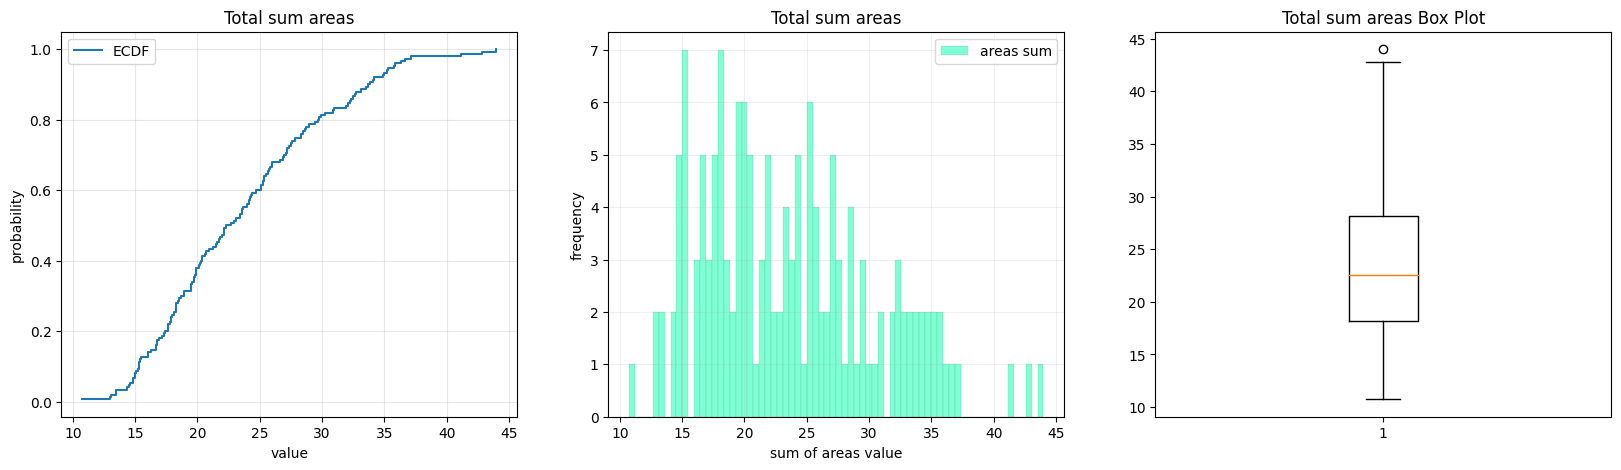

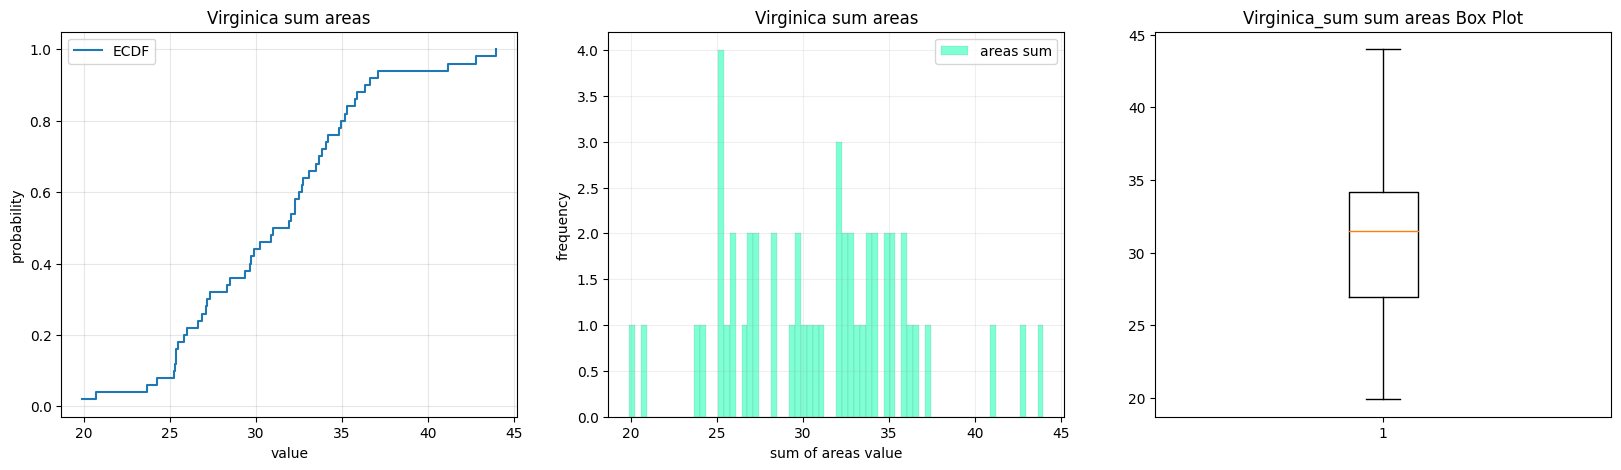

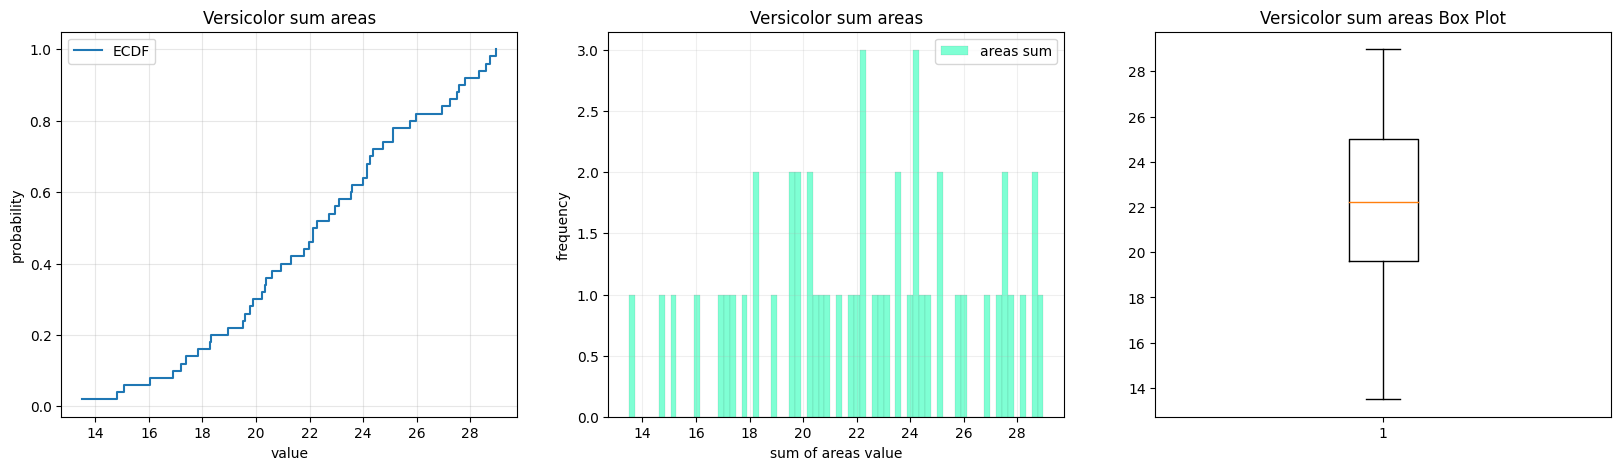

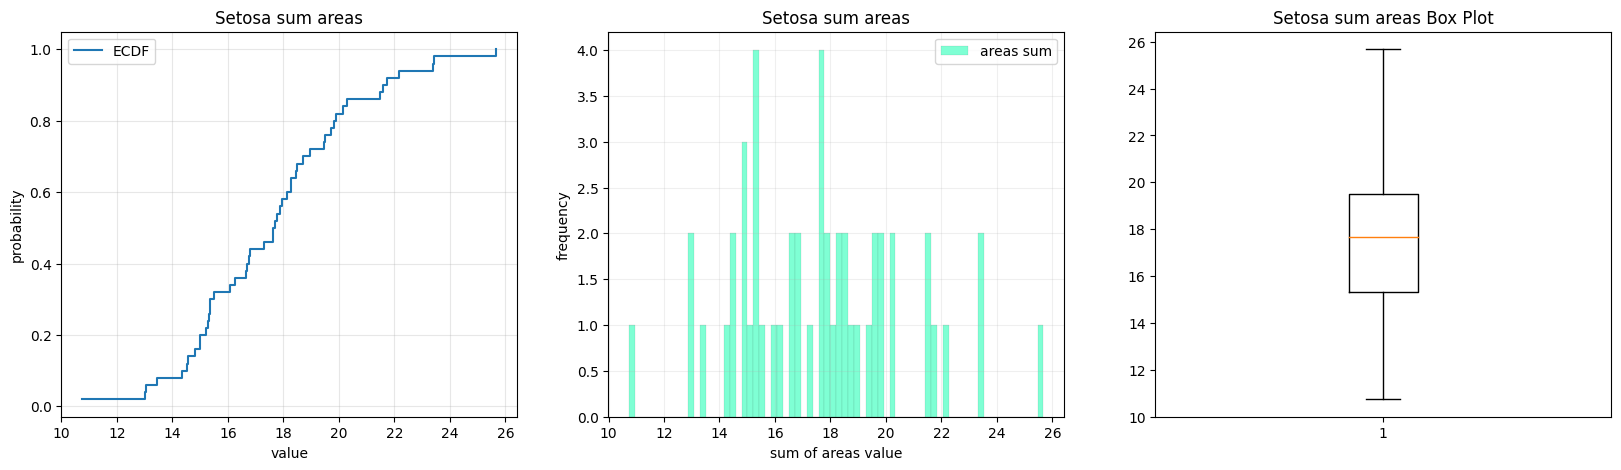

In [ ]:
print("Most frequent kind: " , unique_iris_kinds[most_frequent_idx])
print("Most infrequent kind: " , unique_iris_kinds[least_frequent_idx])
print()

print("Total Sum Statistics:")
print("Mean:", total_sum_statistics[0])
print("Variance:", total_sum_statistics[1])
print("Median:", total_sum_statistics[2])
print("Quantile:", total_sum_statistics[3])
print()

print("Virginica Sum Statistics:")
print("Mean:", virginica_sum_statistics[0])
print("Variance:", virginica_sum_statistics[1])
print("Median:", virginica_sum_statistics[2])
print("Quantile:", virginica_sum_statistics[3])
print()

print("Versicolor Sum Statistics:")
print("Mean:", versicolor_sum_statistics[0])
print("Variance:", versicolor_sum_statistics[1])
print("Median:", versicolor_sum_statistics[2])
print("Quantile:", versicolor_sum_statistics[3])
print()

print("Setosa Sum Statistics:")
print("Mean:", setosa_sum_statistics[0])
print("Variance:", setosa_sum_statistics[1])
print("Median:", setosa_sum_statistics[2])
print("Quantile:", setosa_sum_statistics[3])

plt.figure(figsize=(20, 5))

# Total sum of areas plots
plt.subplot(1, 3, 1)
plt.step(total_unique_values, total_ecdf_values, where='post', label='ECDF')
plt.xlabel('value')
plt.ylabel('probability')
plt.title('Total sum areas')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(total_sum_areas, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="areas sum")
plt.xlabel('sum of areas value')
plt.ylabel('frequency')
plt.title('Total sum areas')
plt.legend()
plt.grid(True, alpha=0.2)

plt.subplot(1, 3, 3)
plt.boxplot(total_sum_areas)
plt.title('Total sum areas Box Plot')
plt.show()

plt.figure(figsize=(20, 5))

# Virginica sum of areas plots
plt.subplot(1, 3, 1)
plt.step(virginica_unique_values, virginica_ecdf_values, where='post', label='ECDF')
plt.xlabel('value')
plt.ylabel('probability')
plt.title('Virginica sum areas')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(virginica_sum, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="areas sum")
plt.xlabel('sum of areas value')
plt.ylabel('frequency')
plt.title('Virginica sum areas')
plt.legend()
plt.grid(True, alpha=0.2)

plt.subplot(1, 3, 3)
plt.boxplot(virginica_sum)
plt.title('Virginica_sum sum areas Box Plot')
plt.show()

plt.figure(figsize=(20, 5))

# Versicolor sum of areas plots
plt.subplot(1, 3, 1)
plt.step(versicolor_unique_values, versicolor_ecdf_values, where='post', label='ECDF')
plt.xlabel('value')
plt.ylabel('probability')
plt.title('Versicolor sum areas')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(versicolor_sum, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="areas sum")
plt.xlabel('sum of areas value')
plt.ylabel('frequency')
plt.title('Versicolor sum areas')
plt.legend()
plt.grid(True, alpha=0.2)

plt.subplot(1, 3, 3)
plt.boxplot(versicolor_sum)
plt.title('Versicolor sum areas Box Plot')
plt.show()

plt.figure(figsize=(20, 5))

# Setosa sum of areas plots
plt.subplot(1, 3, 1)
plt.step(setosa_unique_values, setosa_ecdf_values, where='post', label='ECDF')
plt.xlabel('value')
plt.ylabel('probability')
plt.title('Setosa sum areas')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(setosa_sum, color='aquamarine', ec='black', linewidth=0.05, bins=70, label="areas sum")
plt.xlabel('sum of areas value')
plt.ylabel('frequency')
plt.title('Setosa sum areas')
plt.legend()
plt.grid(True, alpha=0.2)

plt.subplot(1, 3, 3)
plt.boxplot(setosa_sum)
plt.title('Setosa sum areas Box Plot')
plt.show()